# Канатов Николай, 18иад

## Лабоаторная работа

## Данные для работы: https://archive.ics.uci.edu/ml/datasets/First-order+theorem+proving

Данные: имеются характеристики для доказательства теоремы, а также имеется 5 эвристик, с помощью которых доказывается теорема. Задача состоит в следующем: учитывая характеристики, указать какая из 5 эвристик даст самое быстрое доказательство теоремы.

Столбцы с 1 по 14 являются статическими характеристиками и столбцы с 15 по 53 являются динамическими характеристиками. Последние пять столбцов обозначают время в секундах, взятое каждой из пяти эвристик, чтобы доказать соответствующую теорему. Был предел времени в 100 секунд. Запись -100 означает неспособность получить доказательство в течение срока.



Для данной задачи уже предоставленны файлы с тестовыми и обучающими данным. Однако интереснее работать с 'сырыми' данными, поэтому мы будем использовать файл со всеми объектами без преобработки.

Набор данных не имеет пропущенных значений.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Чтение данных

In [2]:
data = pd.read_csv('all-data-raw.csv', sep = ',', header=None, engine = 'python')
data.columns = [u's1',u's2',u's3',u's4',u's5',u's6',u's7',u's8',u's9',u's10',u's11',u's12',u's13',u's14',
                u'd1', u'd2', u'd3', u'd4', u'd5', u'd6', u'd7', u'd8', u'd9', u'd10', u'd11', u'd12', u'd13', u'd14', u'd15',
                u'd16', u'd17', u'd18', u'd19', u'd20', u'd21', u'd22', u'd23', u'd24', u'd25', u'd26', u'd27', u'd28', u'd29',
                u'd30', u'd31', u'd32', u'd33', u'd34', u'd35', u'd36', u'd37', u'd38', u'd39', u'r1', u'r2', u'r3', u'r4', u'r5']
data.shape

(6118, 58)

В приложении к датасету указано, что в нем имеется две ненужных характеристики, это статическая характеристика в столбце 's5' и динамическая характеристика в столбце 'd21', поэтому мы исключим их из нашего набора

In [3]:
data = data.drop(['s5','d21'], axis = 1)
data.shape

(6118, 56)

In [4]:
data.head()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d35,d36,d37,d38,d39,r1,r2,r3,r4,r5
0,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.73684,0.00188,0.73872,0.073308,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00
1,0.83307,0.99682,0.83307,0.76948,0.77107,0.068363,0.16057,6,1.2734,6,...,0.74248,0.00188,0.74436,0.067669,0.18797,0.08,0.08,0.2,0.08,0.08
2,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.74060,0.00188,0.74248,0.069549,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00
3,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.72932,0.00188,0.73120,0.080827,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00
4,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.73120,0.00188,0.73308,0.078947,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00


In [5]:
data.tail()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d35,d36,d37,d38,d39,r1,r2,r3,r4,r5
6113,0.008403,0.77311,0.058824,0.008403,0.025210,0.042017,0.93277,8,3.1597,4,...,0.017544,0.017544,0.087719,0.008772,0.90351,-100.0,-100.0,-100.0,-100.0,-100.0
6114,0.017391,0.77391,0.052174,0.017391,0.043478,0.043478,0.91304,8,3.0783,4,...,0.018349,0.018349,0.091743,0.000000,0.90826,-100.0,-100.0,-100.0,-100.0,-100.0
6115,0.026786,0.79464,0.026786,0.017857,0.035714,0.044643,0.91964,8,3.0268,4,...,0.017391,0.017391,0.086957,0.000000,0.91304,-100.0,-100.0,-100.0,-100.0,-100.0
6116,0.017857,0.79464,0.017857,0.008929,0.026786,0.044643,0.92857,8,3.0357,4,...,0.017241,0.017241,0.086207,0.000000,0.91379,-100.0,-100.0,-100.0,-100.0,-100.0
6117,0.076923,0.69231,0.076923,0.038462,0.153850,0.076923,0.76923,5,2.7692,4,...,0.000000,0.000000,0.000000,0.000000,1.00000,-100.0,-100.0,-100.0,-100.0,-100.0


## Первичная обработка

Нашей задачей является определении подходящей эвристики, на данный момент эту информацию мы можем получить из пяти последних столбцов. Намного проще работать с одним признаком, чем с пятью, поэтому добавим столбец, в котором будем хранить информацию о номере наиболее подходящей эвристики. А затем удалим пять столбцов, где записано время в секундах, поскольку с ними в дальнейшем работать уже не будем.
Если ни одна из эвристик не будет подходить для набора признаков, то в соответствующую ячейку запишим "0".

In [6]:
def getH(lst):
    min=1000
    index=-1
    for i in range(0,len(lst)):
        if lst[i]<min and lst[i]!=-100:
            min=lst[i]
            index=i
    return index+1

In [7]:
data['H']=0
for i in range(0,len(data)):
    data['H'][i]=getH([data.r1[i],data.r2[i],data.r3[i],data.r4[i],data.r5[i]])

D:\Anaconda python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
data = data.drop(['r1','r2','r3','r4','r5'], axis = 1)
data.shape

(6118, 52)

In [9]:
data.head()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
0,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.020202,0.80639,0.99624,0.80263,0.73684,0.00188,0.73872,0.073308,0.18797,0
1,0.83307,0.99682,0.83307,0.76948,0.77107,0.068363,0.16057,6,1.2734,6,...,0.020202,0.80639,0.99624,0.80263,0.74248,0.00188,0.74436,0.067669,0.18797,1
2,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.020202,0.80639,0.99624,0.80263,0.74060,0.00188,0.74248,0.069549,0.18797,0
3,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.020202,0.80639,0.99624,0.80263,0.72932,0.00188,0.73120,0.080827,0.18797,0
4,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.020202,0.80639,0.99624,0.80263,0.73120,0.00188,0.73308,0.078947,0.18797,0


In [10]:
data.tail()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
6113,0.008403,0.77311,0.058824,0.008403,0.025210,0.042017,0.93277,8,3.1597,4,...,0.00000,0.017544,0.47368,0.017544,0.017544,0.017544,0.087719,0.008772,0.90351,0
6114,0.017391,0.77391,0.052174,0.017391,0.043478,0.043478,0.91304,8,3.0783,4,...,0.00000,0.018349,0.44037,0.018349,0.018349,0.018349,0.091743,0.000000,0.90826,0
6115,0.026786,0.79464,0.026786,0.017857,0.035714,0.044643,0.91964,8,3.0268,4,...,0.00000,0.017391,0.41739,0.017391,0.017391,0.017391,0.086957,0.000000,0.91304,0
6116,0.017857,0.79464,0.017857,0.008929,0.026786,0.044643,0.92857,8,3.0357,4,...,0.00000,0.017241,0.40517,0.017241,0.017241,0.017241,0.086207,0.000000,0.91379,0
6117,0.076923,0.69231,0.076923,0.038462,0.153850,0.076923,0.76923,5,2.7692,4,...,0.31313,0.000000,0.75806,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0


In [11]:
data.describe()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
count,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,...,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000
mean,0.367852,0.830860,0.264259,0.300741,0.357758,0.106189,0.536053,7.081399,2.640024,7.725727,...,0.015670,0.192655,0.699686,0.134589,0.182576,0.127697,0.270410,0.046002,0.683588,1.617032
std,0.313888,0.213030,0.268266,0.263988,0.269641,0.119298,0.302384,7.303454,2.274133,7.396474,...,0.145052,0.333571,0.297221,0.250727,0.328448,0.261721,0.321667,0.100175,0.320924,1.773495
min,0.000000,0.007812,0.000000,0.000000,0.000382,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.114572,0.769408,0.101690,0.100000,0.144055,0.031915,0.250000,4.000000,1.811000,3.000000,...,0.000000,0.000000,0.546150,0.000000,0.000000,0.000000,0.046190,0.000000,0.569107,0.000000
50%,0.235290,0.911770,0.136840,0.200000,0.250895,0.069952,0.645390,5.000000,2.193600,5.000000,...,0.000000,0.025641,0.719010,0.031084,0.018868,0.014286,0.131235,0.015873,0.803685,1.000000
75%,0.593355,1.000000,0.333330,0.483870,0.500000,0.116280,0.766420,10.000000,3.034500,7.000000,...,0.020202,0.152410,1.000000,0.096898,0.126253,0.067104,0.324315,0.055118,0.910570,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.982140,0.996600,244.000000,39.070000,86.000000,...,7.888900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


В нашем случае векторизация не является необходимой, так как все признаки являются числовыми.

In [12]:
data.count(axis=0)

s1     6118
s2     6118
s3     6118
s4     6118
s6     6118
s7     6118
s8     6118
s9     6118
s10    6118
s11    6118
s12    6118
s13    6118
s14    6118
d1     6118
d2     6118
d3     6118
d4     6118
d5     6118
d6     6118
d7     6118
d8     6118
d9     6118
d10    6118
d11    6118
d12    6118
d13    6118
d14    6118
d15    6118
d16    6118
d17    6118
d18    6118
d19    6118
d20    6118
d22    6118
d23    6118
d24    6118
d25    6118
d26    6118
d27    6118
d28    6118
d29    6118
d30    6118
d31    6118
d32    6118
d33    6118
d34    6118
d35    6118
d36    6118
d37    6118
d38    6118
d39    6118
H      6118
dtype: int64

In [13]:
corrTable = data.corr()
corrTable

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
s1,1.000000,0.560917,0.155728,0.944824,0.764236,0.392727,-0.836423,-0.346052,-0.423964,-0.096020,...,-0.053085,0.761732,0.533602,-0.058304,0.753992,0.646790,0.631376,-0.093491,-0.603656,-0.051288
s2,0.560917,1.000000,-0.243085,0.553305,0.130169,0.159898,-0.179159,-0.335576,-0.312079,0.228600,...,-0.080934,0.358444,0.772265,-0.348883,0.356206,0.302235,0.115757,-0.055164,-0.098806,-0.067283
s3,0.155728,-0.243085,1.000000,0.073748,0.317164,0.372467,-0.429768,0.214845,-0.043721,-0.231214,...,-0.048571,0.167439,-0.192574,0.838963,0.152924,-0.014453,0.248503,0.242087,-0.324644,0.012292
s4,0.944824,0.553305,0.073748,1.000000,0.821001,0.144898,-0.789268,-0.328135,-0.414262,-0.052904,...,-0.050641,0.746017,0.564710,-0.075621,0.747585,0.627144,0.623199,-0.124496,-0.585781,-0.056761
s6,0.764236,0.130169,0.317164,0.821001,1.000000,0.069910,-0.919299,-0.210448,-0.408609,-0.119686,...,-0.049008,0.641810,0.246135,0.170750,0.642325,0.540804,0.715226,-0.147149,-0.670951,-0.020025
s7,0.392727,0.159898,0.372467,0.144898,0.069910,1.000000,-0.456864,-0.113029,-0.095786,-0.214923,...,-0.030679,0.357712,0.047048,0.112409,0.334814,0.345181,0.300548,0.275055,-0.387101,0.006412
s8,-0.836423,-0.179159,-0.429768,-0.789268,-0.919299,-0.456864,1.000000,0.232254,0.402155,0.191518,...,0.055805,-0.713440,-0.238046,-0.196609,-0.704866,-0.618428,-0.756354,0.022701,0.751019,0.015327
s9,-0.346052,-0.335576,0.214845,-0.328135,-0.210448,-0.113029,0.232254,1.000000,0.613235,-0.159940,...,-0.002683,-0.244335,-0.277654,0.281398,-0.253691,-0.272830,-0.206719,0.115337,0.171196,0.042063
s10,-0.423964,-0.312079,-0.043721,-0.414262,-0.408609,-0.095786,0.402155,0.613235,1.000000,-0.155441,...,0.019333,-0.291564,-0.266843,0.074737,-0.293908,-0.252475,-0.294991,0.077843,0.271376,0.030478
s11,-0.096020,0.228600,-0.231214,-0.052904,-0.119686,-0.214923,0.191518,-0.159940,-0.155441,1.000000,...,0.005974,-0.113948,0.154421,-0.144126,-0.107592,-0.100955,-0.139668,-0.147413,0.186007,-0.202562


In [14]:
corField = []
for i in corrTable:
    for j in corrTable.index[corrTable[i] > 0.9]:
        if ((i != j) and (j not in corField) and (i not in corField)):
            corField.append(j)
            print(i,j, corrTable[i][corrTable.index==j].values[0])

s1 s4 0.9448239827698052
d1 d19 1.0
d4 d25 0.9041171376669671
d4 d27 0.9440956976120498
d4 d29 0.9055857530118522
d20 d31 0.9957256059612296
d32 d35 0.99029122385487


Мы получили столбцы которые сильно коррелируют, таким образом, можем их исключить из наших данных

In [15]:
data = data.drop(['s4','d19','d25','d27','d29','d31','d35'],axis=1)

In [16]:
y = data['H']
y

0       0
1       1
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      1
12      1
13      3
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      4
26      2
27      0
28      5
29      1
       ..
6088    1
6089    3
6090    1
6091    1
6092    1
6093    4
6094    1
6095    3
6096    4
6097    5
6098    1
6099    5
6100    1
6101    0
6102    0
6103    0
6104    0
6105    0
6106    0
6107    3
6108    0
6109    0
6110    0
6111    0
6112    0
6113    0
6114    0
6115    0
6116    0
6117    0
Name: H, Length: 6118, dtype: int64

### Нормализуем данные

In [17]:
data = data.drop('H',axis = 1)
data = (data - data.mean(axis = 0))/data.std(axis = 0)

In [18]:
data.describe()

,s1,s2,s3,s6,s7,s8,s9,s10,s11,s12,...,d26,d28,d30,d32,d33,d34,d36,d37,d38,d39
count,6.118000e+03,6.118000e+03,6.118000e+03,6.118000e+03,6.118000e+03,6.118000e+03,6.118000e+03,6.118000e+03,6.118000e+03,6.118000e+03,...,6.118000e+03,6.118000e+03,6.118000e+03,6.118000e+03,6.118000e+03,6.118000e+03,6.118000e+03,6.118000e+03,6.118000e+03,6.118000e+03
mean,-3.244109e-15,3.017197e-14,-3.519215e-15,2.773961e-15,-1.762413e-14,3.828255e-15,1.697836e-15,2.231239e-14,5.897357e-16,1.429008e-15,...,2.188381e-15,2.538741e-17,-2.063748e-16,8.924792e-16,2.366029e-14,-6.186399e-15,7.490648e-16,-3.076341e-15,1.172104e-16,-2.147496e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.171919e+00,-3.863529e+00,-9.850663e-01,-1.325376e+00,-8.901140e-01,-1.772758e+00,-8.326744e-01,-7.211642e-01,-9.093154e-01,-1.869614e+00,...,-6.461397e-01,-2.771170e-01,-1.625179e-01,-5.775531e-01,-2.354091e+00,-5.367968e-01,-4.879130e-01,-8.406529e-01,-4.592151e-01,-2.130063e+00
25%,-8.069085e-01,-2.884670e-01,-6.060018e-01,-7.925442e-01,-6.225901e-01,-9.459942e-01,-4.219099e-01,-3.645448e-01,-6.389163e-01,-6.833722e-01,...,-5.364160e-01,-2.771170e-01,-1.625179e-01,-5.775531e-01,-5.165704e-01,-5.367968e-01,-4.879130e-01,-6.970587e-01,-4.592151e-01,-3.567216e-01
50%,-4.223210e-01,3.798077e-01,-4.749749e-01,-3.963142e-01,-3.037494e-01,3.615832e-01,-2.849883e-01,-1.963049e-01,-3.685171e-01,-4.631021e-01,...,-2.542655e-01,-2.771170e-01,-1.625179e-01,-5.006848e-01,6.501676e-02,-4.128233e-01,-4.333283e-01,-4.326687e-01,-3.007621e-01,3.742231e-01
75%,7.184194e-01,7.939749e-01,2.574707e-01,5.275238e-01,8.458980e-02,7.618364e-01,3.996193e-01,1.734623e-01,-9.811802e-02,9.871870e-01,...,1.290804e-01,-1.649204e-01,-1.625179e-01,-1.206485e-01,1.010407e+00,-1.503297e-01,-2.315192e-01,1.675795e-01,9.100322e-02,7.072772e-01
max,2.013928e+00,7.939749e-01,2.742582e+00,2.381838e+00,7.342562e+00,1.523055e+00,3.243925e+01,1.601928e+01,1.058265e+01,8.781746e+00,...,1.542080e+01,3.057721e+01,2.984645e+01,2.420311e+00,1.010407e+00,3.451604e+00,3.332944e+00,2.268153e+00,9.523338e+00,9.859416e-01


In [19]:
X = data

### Разделение на тестовую и обучающую выборки

20% тестовая выборка, 80% обучающая выборка

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 72)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

4894 1224


In [21]:
# дополнительно проведем скользящую проверку для каждой модели
from sklearn import cross_validation
score_check = {}
kfold = 5

# словарь в который запишем результат точности, каждого алгоритма
score = {}

D:\Anaconda python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)

train_error = np.mean(y_train != train_predict)
test_error  = np.mean(y_test  != test_predict)
print(train_error, test_error)

0.2568451164691459 0.44281045751633985


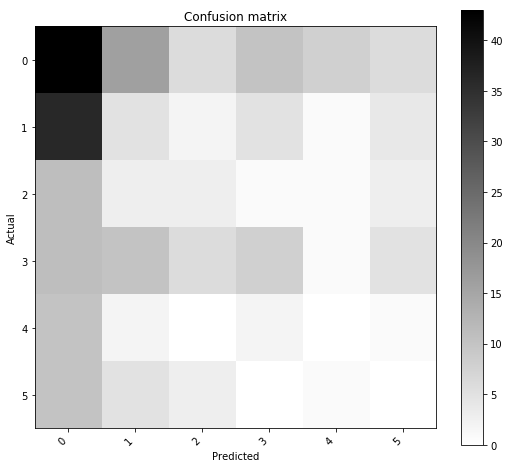

In [23]:
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt

cm = ConfusionMatrix(y_test, test_predict)
cm.plot()

In [24]:
cm.print_stats()

D:\Anaconda python\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


Confusion Matrix:

Predicted    0   1   2   3   4   5  __all__
Actual                                     
0           43  16   6  10   8   6       89
1           36   5   2   5   1   4       53
2           11   3   3   1   1   3       22
3           11  10   6   8   1   5       41
4           10   2   0   2   0   1       15
5           10   5   3   0   1   0       19
__all__    121  41  20  26  12  19      239


Overall Statistics:

Accuracy: 0.24686192468619247
95% CI: (0.19355283332366724, 0.3065669982007042)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.9999999999999999
Kappa: -0.021076616348618647
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                        0          1          2  \
Population                                   239        239        239   
P: Condition positive                         89         53         22   
N: Condition negative                        150        186        217   
Test outcome positive                    

### Подбор параметра k ближайших соседей

In [25]:
from sklearn.grid_search import GridSearchCV
neighbors = [i for i in range(1,30)]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': neighbors}, cv=5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_neighbors)

D:\Anaconda python\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.4358398038414385 2


In [26]:
knn = KNeighborsClassifier(n_neighbors = best_neighbors).fit(X_train, y_train)

train_error = np.mean(y_train != knn.predict(X_train))
test_error  = np.mean(y_test  != knn.predict(X_test))

print(train_error, test_error)

0.2135267674703719 0.4207516339869281


In [27]:
score['knn'] = 1 - test_error
score_check['knn'] = cross_validation.cross_val_score(knn, X, y, cv = kfold)

## SVC

In [28]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

train_error = np.mean(y_train != svc.predict(X_train))
test_error  = np.mean(y_test  != svc.predict(X_test))

print(train_error, test_error)

0.43686146301593787 0.48284313725490197


### Подбор параметров 

In [29]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.4438087454025337 1000.0


In [30]:
svc = SVC(C = best_C).fit(X_train, y_train)

train_error = np.mean(y_train != knn.predict(X_train))
test_error  = np.mean(y_test  != knn.predict(X_test))

print(train_error, test_error)

0.2135267674703719 0.4207516339869281


In [31]:
score['svc'] = 1-test_error
score_check['svc'] = cross_validation.cross_val_score(svc, X, y, cv = kfold)

# Random Forest

In [32]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

train_error = np.mean(y_train != rf.predict(X_train))
test_error  = np.mean(y_test  != rf.predict(X_test))

print(train_error, test_error)

0.021046178994687373 0.37745098039215685


In [33]:
score['RandomForest'] = 1-test_error
score_check['RandomForest'] = cross_validation.cross_val_score(rf, X, y, cv = kfold)

### Значимость признаков

In [39]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("feature sum: %d " % sum(importances))
print("Feature ranking:")

for f in range(len(X.columns)):
    print("%2d. feature '%5s' (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))   

feature sum: 1 
Feature ranking:
 1. feature '   d2' (0.048484)
 2. feature '  s14' (0.042827)
 3. feature '  d14' (0.038138)
 4. feature '  d16' (0.037490)
 5. feature '  s12' (0.036352)
 6. feature '  d12' (0.035179)
 7. feature '  d26' (0.034692)
 8. feature '   d4' (0.034270)
 9. feature '   d6' (0.033550)
10. feature '  d10' (0.032138)
11. feature '   d3' (0.031404)
12. feature '   s7' (0.027816)
13. feature '   s3' (0.027520)
14. feature '  d33' (0.027367)
15. feature '   d8' (0.027352)
16. feature '   s6' (0.026216)
17. feature '  s13' (0.025508)
18. feature '  d34' (0.024544)
19. feature '  d37' (0.023957)
20. feature '  s10' (0.023855)
21. feature '  d39' (0.022642)
22. feature '   s2' (0.021812)
23. feature '  d38' (0.021536)
24. feature '  d36' (0.021040)
25. feature '   d1' (0.020188)
26. feature '   s8' (0.020093)
27. feature '  d32' (0.020034)
28. feature '   s1' (0.020021)
29. feature '  d18' (0.019506)
30. feature '  d13' (0.017857)
31. feature '  d15' (0.017080)
32. fe

(-1, 44)

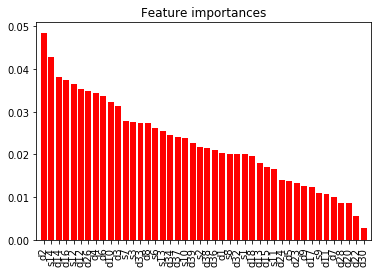

In [40]:
size = len(X.columns)
plt.title("Feature importances")
plt.bar(range(size), importances[indices[:size]], align = 'center', color = 'r')
plt.xticks(range(size), X.columns[indices[:size]], rotation = 90)
plt.xlim([-1, size])

# Extremely Randomized Trees

In [47]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

train_error = np.mean(y_train != ert.predict(X_train))
test_error  = np.mean(y_test  != ert.predict(X_test))

print(train_error, test_error)

0.021046178994687373 0.3790849673202614


In [48]:
score['ExtremelyRandomizedTrees'] = 1-test_error
score_check['ExtremelyRandomizedTrees'] = cross_validation.cross_val_score(ert, X, y, cv = kfold)

# AdaBoost

In [49]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

train_error = np.mean(y_train != ada.predict(X_train))
test_error = np.mean(y_test != ada.predict(X_test))

print(train_error, test_error)

0.4711892112791173 0.5408496732026143


In [50]:
score['AdaBoost'] = 1-test_error
score_check['AdaBoost'] = cross_validation.cross_val_score(ada, X, y, cv = kfold)

# GBT

In [51]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

train_error = np.mean(y_train != gbt.predict(X_train))
test_error = np.mean(y_test != gbt.predict(X_test))

print(train_error, test_error)

0.02758479771148345 0.3954248366013072


In [52]:
score['Gbt'] = 1-test_error
score_check['Gbt'] = cross_validation.cross_val_score(gbt, X, y, cv = kfold)

# Выводы

### Точность построенных моделей

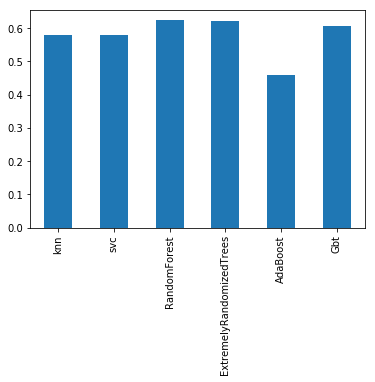

In [53]:
from pandas import DataFrame
DataFrame.from_dict(data = score, orient='index').plot(kind='bar', legend=False)

Как можем заметить из графика, наибольшую точность показали алгоритмы Random Forest и Extremely Randomized Trees.

Но какой из них лучше? На этот вопрос мы сможем ответить, после получения результатов кросс-валидации, т.к. эти результаты будут получены на независимой выборке.

### Результаты кросс-валидации

In [55]:
score_check['knn'] = score_check['knn'].mean()
score_check['svc'] = score_check['svc'].mean()
score_check['RandomForest'] = score_check['RandomForest'].mean()
score_check['ExtremelyRandomizedTrees'] = score_check['ExtremelyRandomizedTrees'].mean()
score_check['AdaBoost'] = score_check['AdaBoost'].mean()
score_check['Gbt'] = score_check['Gbt'].mean()

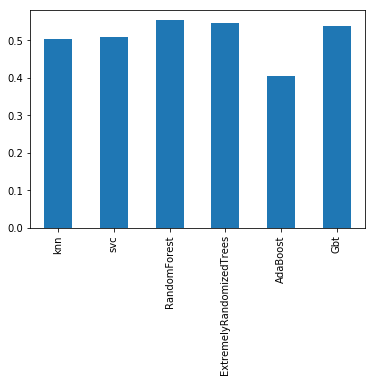

In [57]:
DataFrame.from_dict(data = score_check, orient='index').plot(kind='bar', legend=False)

На данном графике изображено значение точности каждой из модели на независимом наборе данных, полученные с помощью скользящего контроля. Для этого была использована функция  cross_val_score модуля cross_validation. 

Как видно из графика, лучше всего с поставленной задачей справилась модель построенная с помощью случайного леса, показав немного  большую точность, чем модели, обученные с помощью алгоритмов рандоминизированных деревьев и градиетного бустинга.
Хуже всего справилась модель AdaBoost.

In [58]:
print(score_check['RandomForest'], score_check['ExtremelyRandomizedTrees'], score_check['Gbt'])

0.5523071107676542 0.5465817290543681 0.5362975981604448


Результаты кросс-валидации говорят нам о том, что модель построенная с помощью Random Forest оказалась самой точной. Таким образом, мы можем использовать эту модель на готовых тестовых данных, предоставленных в задаче, заведомо зная, что она покажет лучший результат по сравнению с остальными моделями.

Довольно большой процент ошибки в каждой из моделей можно объяснить тем, что предоставленных данных оказалось недостаточно, или же они оказались протеворечивыми (признаки могли быть практически одинаковыми, незначительно отличающимися друг от друга, однако по данным признакам разные эвристики показали наилучший результат)

Также стоит отметить, что подобающее число объектов относится к классу '0', и сравнительно небольшое значение объектов относятся к остальным классам.

In [59]:
data_test = pd.read_csv('test.csv', sep = ',', header=None, engine = 'python')
data_test.shape

(1530, 57)

In [60]:
data_test.columns = [u's1',u's2',u's3',u's4',u's6',u's7',u's8',u's9',u's10',u's11',u's12',u's13',u's14',
                u'd1', u'd2', u'd3', u'd4', u'd5', u'd6', u'd7', u'd8', u'd9', u'd10', u'd11', u'd12', u'd13', u'd14', u'd15',
                u'd16', u'd17', u'd18', u'd19', u'd20', u'd22', u'd23', u'd24', u'd25', u'd26', u'd27', u'd28', u'd29',
                u'd30', u'd31', u'd32', u'd33', u'd34', u'd35', u'd36', u'd37', u'd38', u'd39', u'h1', u'h2', u'h3', u'h4', u'h5',u'h6']

Данные уже представленны без 2-х признаков, о которох было сказано в самом начале работы.


Для объекта, если не определена наилучшая эвристика, то в последнем столбце стоит 1, в противном случае, стоит -1. Последние пять столбцов с конца, не считая самый последний столбец, отвечают за одну из пяти эвристик. Соотвественно, если одна из них определена как лучшая, то записана 1, иначе -1.

Пример, где эвристика ни одна из эвристик не определена:

In [61]:
data_test[4:5]

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d36,d37,d38,d39,h1,h2,h3,h4,h5,h6
4,0.079707,0.28115,0.067832,0.063937,-0.065041,0.013117,0.052817,-0.009172,-0.02981,-0.36924,...,-0.36529,-0.30419,0.98631,0.004927,-1,-1,-1,-1,-1,1


Пример, где лучший результат показала 4-ая эвристика:

In [62]:
data_test[3:4]

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d36,d37,d38,d39,h1,h2,h3,h4,h5,h6
3,-0.68993,-0.29367,-0.57052,-0.65296,-0.84061,-0.33245,0.87885,0.26323,0.42516,-0.50533,...,-0.4899,0.22958,0.70488,-0.44661,-1,-1,-1,1,-1,-1


Заменим последние 6 столбцов на 1, в котором укажем номер самой лучшей эвристики, если такой не будет, то запишем 0.

In [63]:
def getH(lst):
    index=-1
    for i in range(0,len(lst)):
        if lst[i] == 1:
            index=i+1
    if(index==6):
        return 0
    return index

In [64]:
data_test['H']=0
for i in range(0,len(data_test)):
    data_test['H'][i]=getH([data_test.h1[i],data_test.h2[i],data_test.h3[i],data_test.h4[i],data_test.h5[i],data_test.h6[i]])

D:\Anaconda python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
data_test = data_test.drop(['h1','h2','h3','h4','h5','h6'], axis = 1)
data_test.shape

(1530, 52)

In [66]:
data_test.head()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
0,-0.715880,-3.00440,2.117800,-0.601430,2.215900,-0.537990,-1.763800,0.263230,-0.213340,-0.64141,...,-0.11229,-0.53451,-2.27430,2.07240,-0.51227,-0.43436,1.008800,-0.46486,-0.873860,3
1,-0.397340,-0.21463,-0.476530,-0.559270,0.070425,0.614320,-0.302890,-0.417770,-0.071453,-0.64141,...,0.30551,-0.57834,-1.59760,-0.54541,-0.55678,-0.48990,0.052101,0.28711,-0.140210,1
2,2.009400,0.83152,-0.570520,2.232600,1.965400,0.032973,-1.763800,-0.826370,-0.709950,-0.64141,...,-0.11229,2.41110,0.99018,-0.54541,2.47930,3.07240,2.257900,-0.46486,-2.131800,1
3,-0.689930,-0.29367,-0.570520,-0.652960,-0.840610,-0.332450,0.878850,0.263230,0.425160,-0.50533,...,0.09661,-0.57834,-0.42393,-0.54541,-0.55678,-0.48990,0.229580,0.70488,-0.446610,4
4,0.079707,0.28115,0.067832,0.063937,-0.065041,0.013117,0.052817,-0.009172,-0.029810,-0.36924,...,-0.11229,-0.44067,-0.43881,-0.51908,-0.45691,-0.36529,-0.304190,0.98631,0.004927,0


In [67]:
data_test.tail()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
1525,2.009400,0.83152,-0.64572,2.30750,2.038300,-0.13313,-1.763800,-0.82637,-0.70995,0.31119,...,-0.11229,2.41110,0.990180,-0.54541,2.47930,2.62900,2.25790,-0.46486,-2.13180,0
1526,0.062779,-0.70283,1.23150,0.28188,0.089949,-0.73375,0.206700,0.67183,0.12618,0.17510,...,-0.11229,0.68241,0.075317,1.42130,0.69724,0.89358,0.55147,-0.33409,-0.45327,0
1527,0.253910,0.66413,-0.10430,0.41880,0.201620,-0.58160,0.047736,-0.28157,-0.22237,-0.09707,...,-0.11229,-0.50266,0.990180,-0.44407,-0.47992,-0.39400,-0.70757,-0.33795,0.81584,5
1528,1.230800,0.83152,-0.51883,1.25350,1.013300,0.14717,-0.960320,-0.55397,-0.55033,0.71944,...,-0.11229,-0.53624,0.990180,-0.54541,-0.51402,-0.43655,-0.74174,-0.46486,0.88904,0
1529,2.009400,0.83152,-0.75147,2.41290,2.140800,-0.36670,-1.763800,-0.82637,-0.70995,-0.64141,...,-0.11229,2.41110,0.990180,-0.54541,2.47930,2.66320,2.25790,-0.46486,-2.13180,3


Поскольку данные, считаются уже предобработанными, то ничего с ними делать не будем и сразу запустим нашу модель Random Forest. 

На данный момент мы имеем набор объектов с 52 признаками. Однако, все наши модели были обучены для объектов с 44 характеристиками, т.к. мы отбросили часть характеристик сильно коррелирующих друг с другом. Поэтому, нам придется проделать с этими данными то же самое (Удалить характеристики, которые были исключены ранее).

In [68]:
data_test = data_test.drop(['s4','d19','d25','d27','d29','d31','d35'],axis=1)

In [69]:
real_class = data_test['H']
data_test = data_test.drop(['H'],axis=1)

In [71]:
error  = np.mean(real_class  != rf.predict(data_test))
error

0.2568627450980392

Как мы видим, на подготовленной тестовой выборке, мы получили меньшую ошибку. Можно предположить, что если мы бы обучали наши модели на уже подготовленных данных для обучающей выборки, предоставленной в задаче, то мы бы добились большей точности. 

Но всегда интереснее работать с ещё неподготовленными данными :)